# Tutorial

## Tutorial

### Setting up environment

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
sys.path.insert(0, os.path.abspath("../nsforest/nsforesting"))
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import nsforest as ns
from nsforest import utils
from nsforest import preprocessing as pp
from nsforest import nsforesting
from nsforest import evaluating as ev
from nsforest import plotting as pl

### Data Exploration

#### Loading h5ad AnnData file

In [2]:
data_folder = "../demo_data/"
file = data_folder + "adata_layer1.h5ad"
adata = sc.read_h5ad(file)
adata

AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'

#### Defining `cluster_header` as cell type annotation. 

**Note:** Some datasets have multiple annotations per sample (ex. "broad_cell_type" and "granular_cell_type"). NS-Forest can be run on multiple `cluster_header`'s. Combining the parent and child markers may improve classification results. 

In [3]:
cluster_header = "cluster"

#### Defining `output_folder` for saving results

In [4]:
output_folder = "../outputs_layer1/"

#### Looking at sample labels

In [5]:
adata.obs_names

Index(['A01_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A01_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       'A02_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A03_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A04_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A04_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A04_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       'A05_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A05_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A05_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       ...
       'P09_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH7',
       'P09_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',
       'P09_1_Nuclei_NeuNN_H200_1030_MTG_layer1_BCH8',
       'P09_BCH1_1NeuNN_H200.1025_MTG_layer_1',
       'P10_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH6',
       'P10_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',
       'P10_BCH1_1NeuNN_H200.1025_MTG_layer_1',
       'P11_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH7',
       'P11_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',


#### Looking at genes

**Note:** `adata.var_names` must be unique. If there is a problem, usually it can be solved by assigning `adata.var.index = adata.var["ensembl_id"]`. 

In [6]:
adata.var_names

Index(['A1CF', 'A2M', 'A2M_AS1', 'A2ML1', 'A2ML1_AS1', 'A2MP1', 'A3GALT2',
       'A4GALT', 'AAAS', 'AACS',
       ...
       'ZUFSP', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=16497)

#### Checking cell annotation sizes 

**Note:** Some datasets are too large and need to be downsampled to be run through the pipeline. When downsampling, be sure to have all the granular cluster annotations represented. 

In [7]:
adata.obs[cluster_header].value_counts()

cluster
e1_e299_SLC17A7_L5b_Cdh13     299
i1_i90_COL5A2_Ndnf_Car4        90
i2_i77_LHX6_Sst_Cbln4          77
i3_i56_BAGE2_Ndnf_Cxcl14       56
i4_i54_MC4R_Ndnf_Cxcl14        54
g1_g48_GLI3_Astro_Gja1         48
i5_i47_TRPC3_Ndnf_Car4         47
i6_i44_GPR149_Vip_Mybpc1       44
i7_i31_CLMP_Ndnf_Cxcl14        31
g2_g27_APBB1IP_Micro_Ctss      27
i8_i27_SNCG_Vip_Mybpc1         27
i9_i22_TAC3_Vip_Mybpc1         22
g3_g18_GPNMB_OPC_Pdgfra        18
i10_i16_TSPAN12_Vip_Mybpc1     16
g4_g9_MOG_Oligo_Opalin          9
i11_i6_EGF_Vip_Mybpc1           6
Name: count, dtype: int64

### Preprocessing

#### Generating scanpy dendrogram

**Note:** Only run if there is no pre-defined dendrogram order. This step can still be run with no effects, but the runtime may increase. 

Dendrogram order is stored in `adata.uns["dendrogram_cluster"]["categories_ordered"]`. 

This dataset has a pre-defined dendrogram order, so running this step is not necessary. 

         Falling back to preprocessing with `sc.pp.pca` and default params.


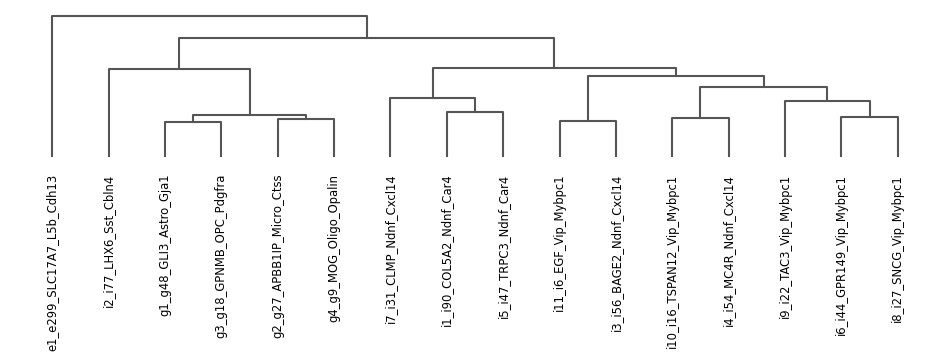

AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'

In [8]:
ns.pp.dendrogram(adata, cluster_header, save = True, output_folder = output_folder, outputfilename_suffix = cluster_header)

#### Calculating cluster medians per gene

Run `ns.pp.prep_medians` before running NS-Forest.

**Note:** Do **not** run if evaluating marker lists. Do **not** run when generating scanpy plots (e.g. dot plot, violin plot, matrix plot). 

In [9]:
adata = ns.pp.prep_medians(adata, cluster_header)
adata

Calculating medians...


Calculating medians (means) per cluster: 100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 44.13it/s]

Saving calculated medians as adata.varm.medians_cluster
--- 0.39310503005981445 seconds ---
median: 0.0
mean: 1.62611
std: 2.4904928
Only positive genes selected. 11688 positive genes out of 16497 total genes


AnnData object with n_obs × n_vars = 871 × 11688
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'
    varm: 'medians_cluster'

#### Calculating binary scores per gene per cluster

Run `ns.pp.prep_binary_scores` before running NS-Forest. Do not need to run if evaluating marker lists. Do not need to run when generating scanpy plots. 

In [10]:
adata = ns.pp.prep_binary_scores(adata, cluster_header)
adata

Calculating binary scores...


Calculating binary scores per cluster: 100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:09<00:00,  1.65it/s]

Saving calculated binary scores as adata.varm.binary_scores_cluster
--- 9.733755826950073 seconds ---
median: 0.1
mean: 0.2016436226562706
std: 0.25240082537926


AnnData object with n_obs × n_vars = 871 × 11688
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'
    varm: 'medians_cluster', 'binary_scores_cluster'

#### Plotting median and binary score distributions

Saving median distributions as...
../outputs_layer1/cluster_medians.png


<Figure size 640x480 with 0 Axes>

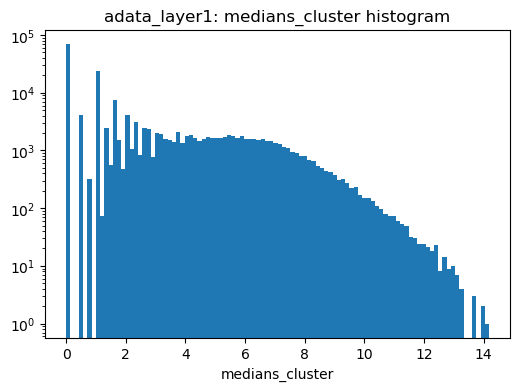

In [11]:
plt.clf()
filename = output_folder + cluster_header + '_medians.png'
print(f"Saving median distributions as...\n{filename}")
a = plt.figure(figsize = (6, 4))
a = plt.hist(adata.varm["medians_" + cluster_header].unstack(), bins = 100)
a = plt.title(f'{file.split("/")[-1].replace(".h5ad", "")}: {"medians_" + cluster_header} histogram')
a = plt.xlabel("medians_" + cluster_header)
a = plt.yscale("log")
a = plt.savefig(filename, bbox_inches='tight')
plt.show()

Saving binary_score distributions as...
../outputs_layer1/cluster_binary_scores.png


<Figure size 640x480 with 0 Axes>

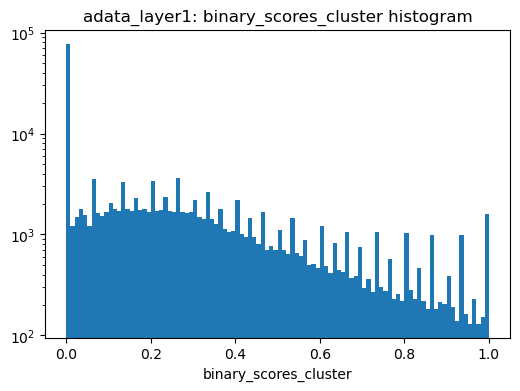

In [12]:
plt.clf()
filename = output_folder + cluster_header + '_binary_scores.png'
print(f"Saving binary_score distributions as...\n{filename}")
a = plt.figure(figsize = (6, 4))
a = plt.hist(adata.varm["binary_scores_" + cluster_header].unstack(), bins = 100)
a = plt.title(f'{file.split("/")[-1].replace(".h5ad", "")}: {"binary_scores_" + cluster_header} histogram')
a = plt.xlabel("binary_scores_" + cluster_header)
a = plt.yscale("log")
a = plt.savefig(filename, bbox_inches='tight')
plt.show()

#### Saving preprocessed AnnData as new h5ad

In [13]:
filename = file.replace(".h5ad", "_preprocessed.h5ad")
print(f"Saving new anndata object as...\n{filename}")
adata.write_h5ad(filename)

Saving new anndata object as...
../demo_data/adata_layer1_preprocessed.h5ad


### Running NS-Forest

**Note:** Do not run NS-Forest if only evaluating input marker lists. 

In [14]:
outputfilename_prefix = cluster_header
results = nsforesting.NSForest(adata, cluster_header, output_folder = output_folder, outputfilename_prefix = outputfilename_prefix)

Preparing adata...
--- 0.004717111587524414 seconds ---
Pre-selecting genes based on binary scores...
	 Threshold (mean + 2 * std): 0.7064452734147906
	Average number of genes after gene_selection in each cluster: 735.5
Number of clusters to evaluate: 16
1 out of 16:
	e1_e299_SLC17A7_L5b_Cdh13
	 Pre-selected 1356 genes to feed into Random Forest.
	['LINC00507']
	fbeta: 0.9597411933860532
	PPV: 0.978021978021978
	recall: 0.8929765886287625
2 out of 16:
	g1_g48_GLI3_Astro_Gja1
	 Pre-selected 583 genes to feed into Random Forest.
	['LINC00498']
	fbeta: 0.95
	PPV: 1.0
	recall: 0.7916666666666666
3 out of 16:
	g2_g27_APBB1IP_Micro_Ctss
	 Pre-selected 420 genes to feed into Random Forest.
	['ADAM28', 'PTPRC']
	fbeta: 0.975609756097561
	PPV: 1.0
	recall: 0.8888888888888888
4 out of 16:
	g3_g18_GPNMB_OPC_Pdgfra
	 Pre-selected 353 genes to feed into Random Forest.
	['GPNMB', 'OLIG2']
	fbeta: 0.8620689655172413
	PPV: 1.0
	recall: 0.5555555555555556
5 out of 16:
	g4_g9_MOG_Oligo_Opalin
	 Pre-sele

Calculating medians (means) per cluster: 100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 2432.80it/s]

Saving final results table as...
../outputs_layer1/cluster_results.csv
--- 12.829238891601562 seconds ---


In [15]:
results

clusterName  clusterSize   f_score       PPV    recall  \
0    e1_e299_SLC17A7_L5b_Cdh13          299  0.959741  0.978022  0.892977   
1       g1_g48_GLI3_Astro_Gja1           48  0.950000  1.000000  0.791667   
2    g2_g27_APBB1IP_Micro_Ctss           27  0.975610  1.000000  0.888889   
3      g3_g18_GPNMB_OPC_Pdgfra           18  0.862069  1.000000  0.555556   
4       g4_g9_MOG_Oligo_Opalin            9  1.000000  1.000000  1.000000   
5   i10_i16_TSPAN12_Vip_Mybpc1           16  0.803571  0.900000  0.562500   
6        i11_i6_EGF_Vip_Mybpc1            6  0.714286  1.000000  0.333333   
7      i1_i90_COL5A2_Ndnf_Car4           90  0.907821  0.970149  0.722222   
8        i2_i77_LHX6_Sst_Cbln4           77  0.816619  0.838235  0.740260   
9     i3_i56_BAGE2_Ndnf_Cxcl14           56  0.781250  0.961538  0.446429   
10     i4_i54_MC4R_Ndnf_Cxcl14           54  0.857143  0.923077  0.666667   
11      i5_i47_TRPC3_Ndnf_Car4           47  0.906433  1.000000  0.659574   
12    i6_i44_GPR149_Vip_Mybpc1           44  0.791667  1.000000  0.431818   
13     i7_i31_CLMP_Ndnf_Cxcl14           31  0.900901  1.000000  0.645161   
14      i8_i27_SNCG_Vip_Mybpc1           27  0.759494  0.923077  0.444444   
15      i9_i22_TAC3_Vip_Mybpc1           22  0.689655  0.888889  0.363636   

     TN  FP  FN   TP  marker_count    NSForest_markers  \
0   566   6  32  267             1         [LINC00507]   
1   823   0  10   38             1         [LINC00498]   
2   844   0   3   24             2     [ADAM28, PTPRC]   
3   853   0   8   10             2      [GPNMB, OLIG2]   
4   862   0   0    9             1              [ST18]   
5   854   1   7    9             2   [TSPAN12, CHRNB3]   
6   865   0   4    2             2       [EGF, FBRSL1]   
7   779   2  25   65             2      [COL5A2, BMP6]   
8   783  11  20   57             1              [LHX6]   
9   814   1  31   25             2      [BAGE2, SYT10]   
10  814   3  18   36             2  [ARHGAP36, ADAM33]   
11  824   0  16   31             2       [NTNG1, EYA4]   
12  827   0  25   19             2      [FLT1, GPR149]   
13  840   0  11   20             2      [PAX6, TGFBR2]   
14  843   1  15   12             2       [SNCG, EDNRA]   
15  848   1  14    8             2      [BSPRY, MCTP2]   

                                         binary_genes  onTarget  
0   [SLC17A7, LINC00508, TBR1, ANKRD33B, NPTX1, LI...  0.479336  
1   [LINC00498, SLC25A18, EMX2OS, FAM189A2, SLC7A1...  0.882322  
2   [ADAM28, PLCG2, INPP5D, PTPRC, CSF2RA, P2RY13,...  0.736514  
3   [GPNMB, COL20A1, OLIG2, STK32A, KLRC3, KLRC2, ...  0.656991  
4   [ST18, MOBP, CNDP1, MOG, CD22, FOLH1, TF, CARN...  0.622487  
5   [TSPAN12, TMC5, LINC01539, CHRNB3, FAM46A, ANG...  0.370267  
6   [EGF, FZD8, KCNJ2_AS1, FBRSL1, TEKT1, NRG3_AS1...  0.356487  
7   [NMBR, COL5A2, C8ORF4, PAPSS2, TRPC3, BMP6, SS...  0.299027  
8   [LHX6, FLT3, TAC1, CALB1, RSPO3, TRBC2, GRIK3,...  0.795864  
9   [BAGE2, SCN5A, GREM2, FAM19A4, SYT10, ARHGAP18...  0.282582  
10  [ARHGAP36, MC4R, COBLL1, HLA_B, LINC01435, ADA...  0.394957  
11  [SSTR2, KIRREL, TRPC3, NTNG1, TARID, EYA4, CA2...  0.265959  
12  [FLT1, PLCE1_AS1, CXCL12, SLC22A3, PLCE1_AS2, ...  0.455438  
13  [KIAA1644, FGF10, CLMP, PAX6, SP8, TGFBR2, WIF...  0.364283  
14  [SNCG, MMRN2, EDNRA, FBN3, KCNK2, RGS2, SCML4,...  0.474188  
15  [BSPRY, OFD1P10Y, MCTP2, OFD1P8Y, OFD1P15Y, OF...  0.467223

#### Plotting classification metrics from NS-Forest results

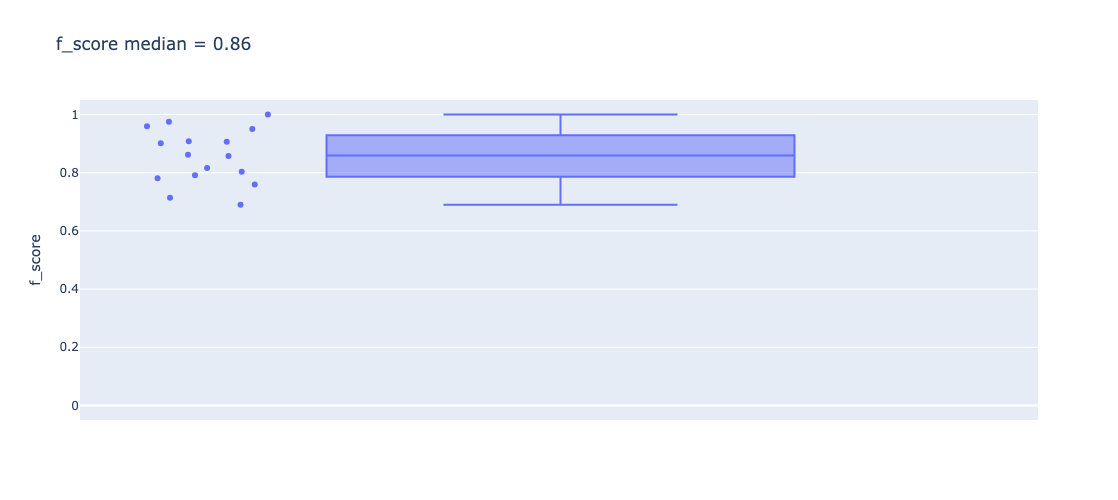

In [16]:
ns.pl.boxplot(results, "f_score")

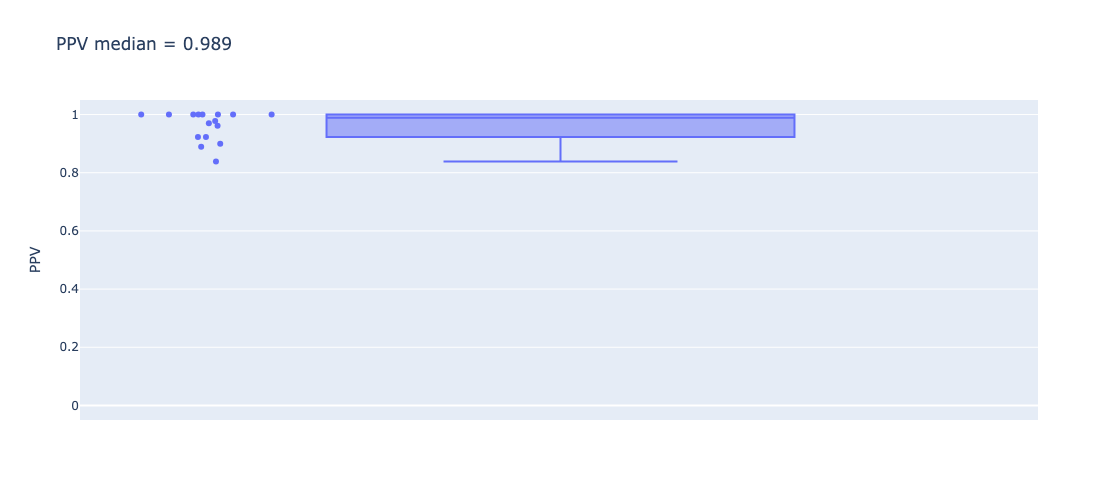

In [17]:
ns.pl.boxplot(results, "PPV")

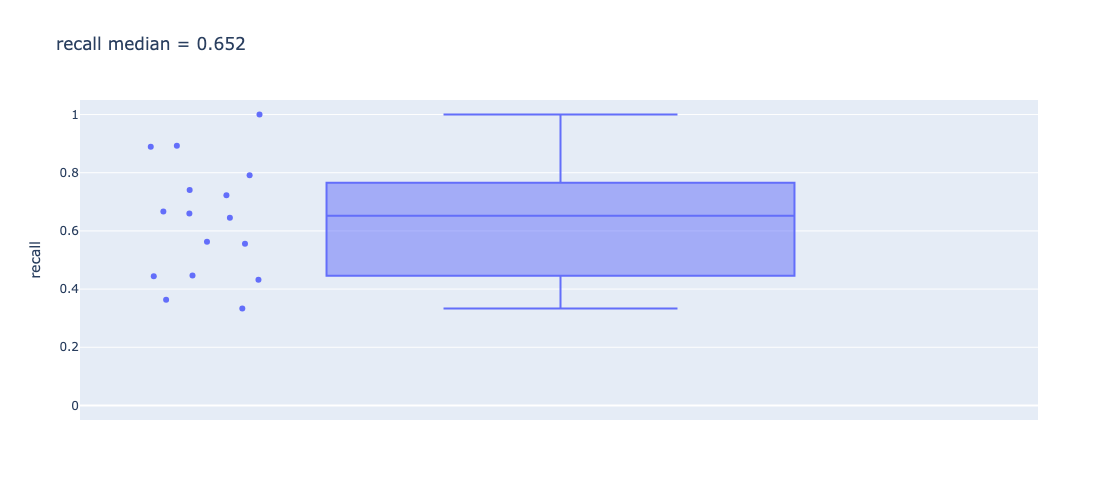

In [18]:
ns.pl.boxplot(results, "recall")

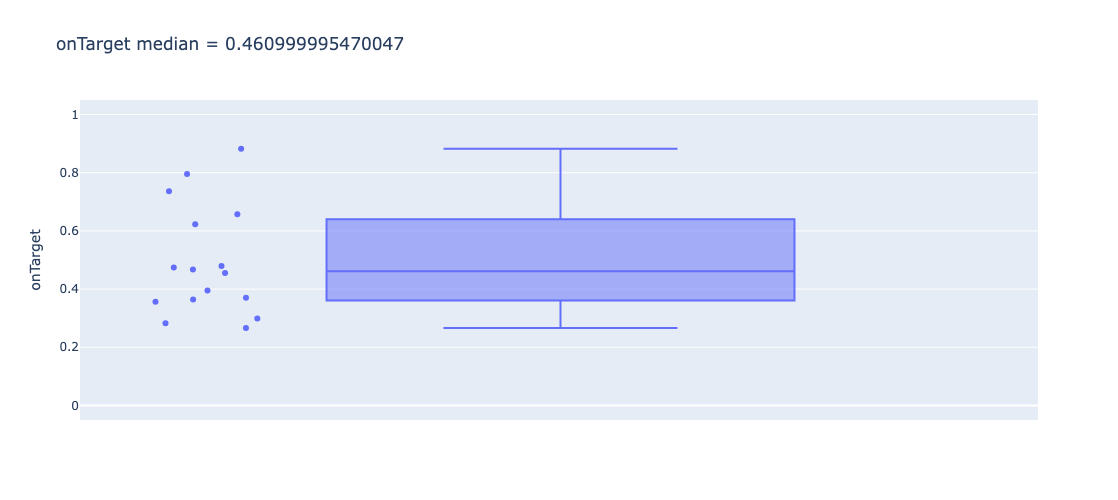

In [19]:
ns.pl.boxplot(results, "onTarget")

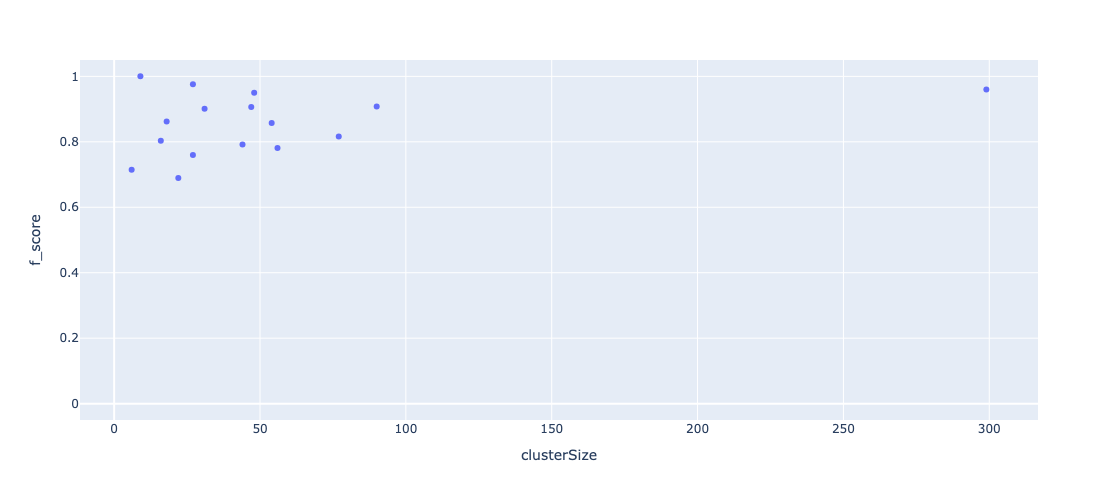

In [20]:
ns.pl.scatter_w_clusterSize(results, "f_score")

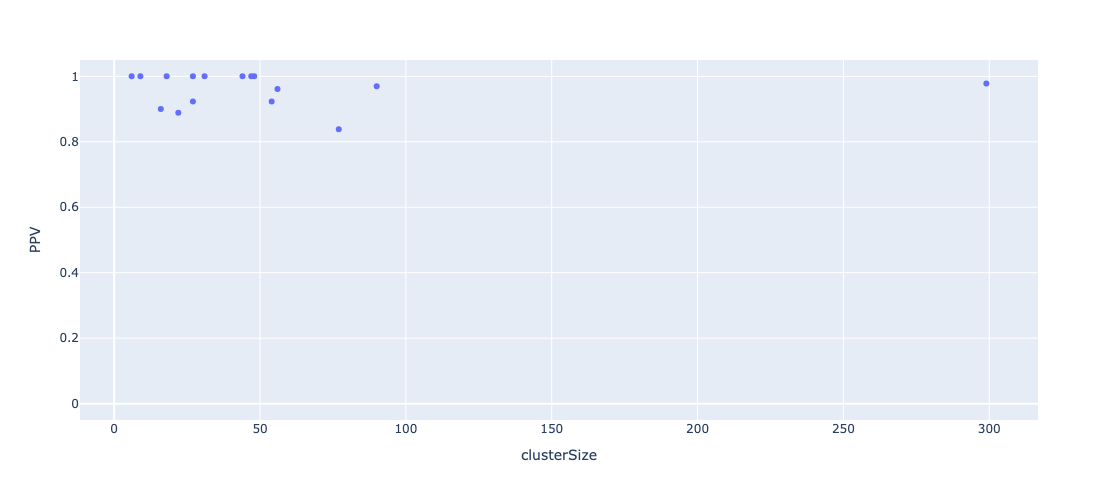

In [21]:
ns.pl.scatter_w_clusterSize(results, "PPV")

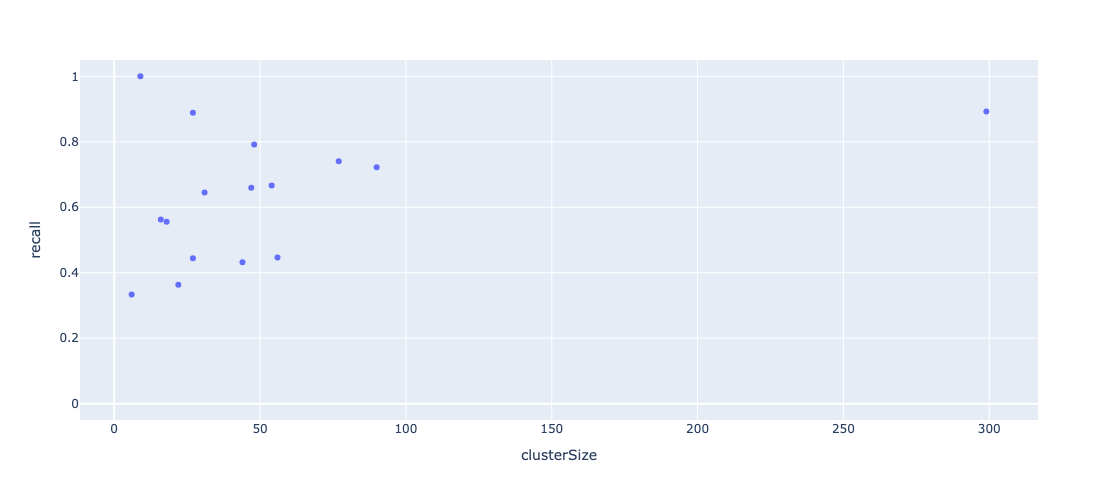

In [22]:
ns.pl.scatter_w_clusterSize(results, "recall")

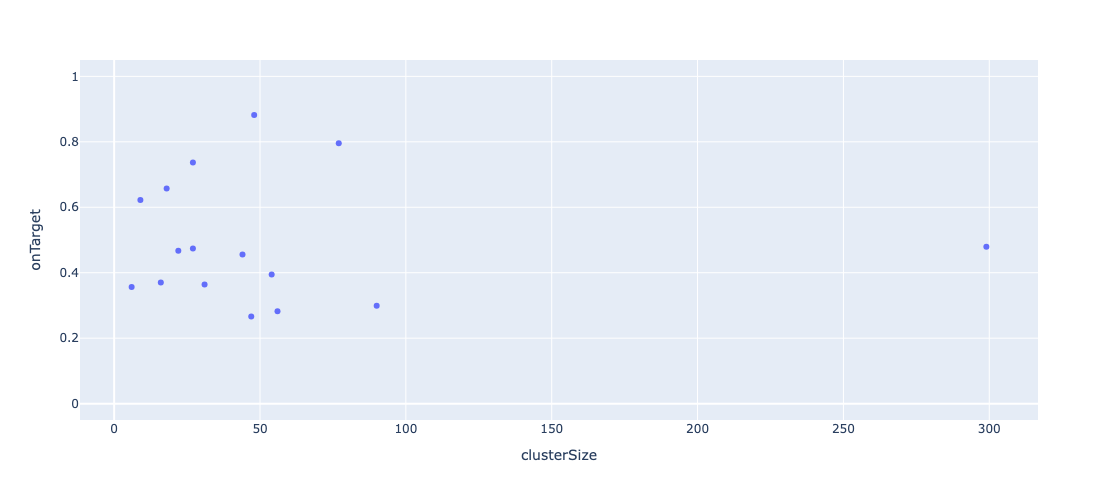

In [23]:
ns.pl.scatter_w_clusterSize(results, "onTarget")

### Plotting scanpy dot plot, violin plot, matrix plot for NS-Forest markers

**Note:** Assign pre-defined dendrogram order here **or** use `adata.uns["dendrogram_" + cluster_header]["categories_ordered"]`. 

In [24]:
to_plot = results.copy()

In [25]:
dendrogram = [] # custom dendrogram order
dendrogram = list(adata.uns["dendrogram_" + cluster_header]["categories_ordered"])
to_plot["clusterName"] = to_plot["clusterName"].astype("category")
to_plot["clusterName"] = to_plot["clusterName"].cat.set_categories(dendrogram)
to_plot = to_plot.sort_values("clusterName")
to_plot = to_plot.rename(columns = {"NSForest_markers": "markers"})
to_plot.head()

clusterName  clusterSize   f_score       PPV    recall   TN  \
0  e1_e299_SLC17A7_L5b_Cdh13          299  0.959741  0.978022  0.892977  566   
8      i2_i77_LHX6_Sst_Cbln4           77  0.816619  0.838235  0.740260  783   
1     g1_g48_GLI3_Astro_Gja1           48  0.950000  1.000000  0.791667  823   
3    g3_g18_GPNMB_OPC_Pdgfra           18  0.862069  1.000000  0.555556  853   
2  g2_g27_APBB1IP_Micro_Ctss           27  0.975610  1.000000  0.888889  844   

   FP  FN   TP  marker_count          markers  \
0   6  32  267             1      [LINC00507]   
8  11  20   57             1           [LHX6]   
1   0  10   38             1      [LINC00498]   
3   0   8   10             2   [GPNMB, OLIG2]   
2   0   3   24             2  [ADAM28, PTPRC]   

                                        binary_genes  onTarget  
0  [SLC17A7, LINC00508, TBR1, ANKRD33B, NPTX1, LI...  0.479336  
8  [LHX6, FLT3, TAC1, CALB1, RSPO3, TRBC2, GRIK3,...  0.795864  
1  [LINC00498, SLC25A18, EMX2OS, FAM189A2, SLC7A1...  0.882322  
3  [GPNMB, COL20A1, OLIG2, STK32A, KLRC3, KLRC2, ...  0.656991  
2  [ADAM28, PLCG2, INPP5D, PTPRC, CSF2RA, P2RY13,...  0.736514

In [26]:
markers_dict = dict(zip(to_plot["clusterName"], to_plot["markers"]))
markers_dict

{'e1_e299_SLC17A7_L5b_Cdh13': ['LINC00507'],
 'i2_i77_LHX6_Sst_Cbln4': ['LHX6'],
 'g1_g48_GLI3_Astro_Gja1': ['LINC00498'],
 'g3_g18_GPNMB_OPC_Pdgfra': ['GPNMB', 'OLIG2'],
 'g2_g27_APBB1IP_Micro_Ctss': ['ADAM28', 'PTPRC'],
 'g4_g9_MOG_Oligo_Opalin': ['ST18'],
 'i7_i31_CLMP_Ndnf_Cxcl14': ['PAX6', 'TGFBR2'],
 'i1_i90_COL5A2_Ndnf_Car4': ['COL5A2', 'BMP6'],
 'i5_i47_TRPC3_Ndnf_Car4': ['NTNG1', 'EYA4'],
 'i11_i6_EGF_Vip_Mybpc1': ['EGF', 'FBRSL1'],
 'i3_i56_BAGE2_Ndnf_Cxcl14': ['BAGE2', 'SYT10'],
 'i10_i16_TSPAN12_Vip_Mybpc1': ['TSPAN12', 'CHRNB3'],
 'i4_i54_MC4R_Ndnf_Cxcl14': ['ARHGAP36', 'ADAM33'],
 'i9_i22_TAC3_Vip_Mybpc1': ['BSPRY', 'MCTP2'],
 'i6_i44_GPR149_Vip_Mybpc1': ['FLT1', 'GPR149'],
 'i8_i27_SNCG_Vip_Mybpc1': ['SNCG', 'EDNRA']}

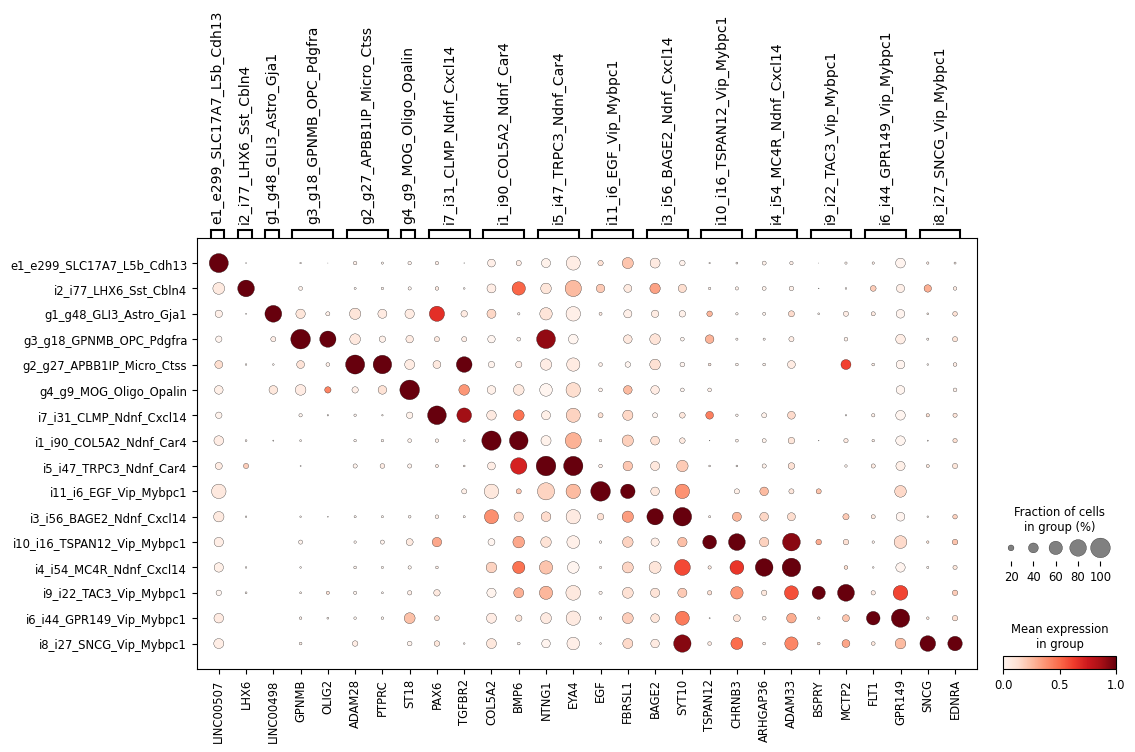

In [27]:
ns.pl.dotplot(adata, markers_dict, cluster_header, dendrogram = dendrogram, save = True, output_folder = output_folder, outputfilename_suffix = outputfilename_prefix)

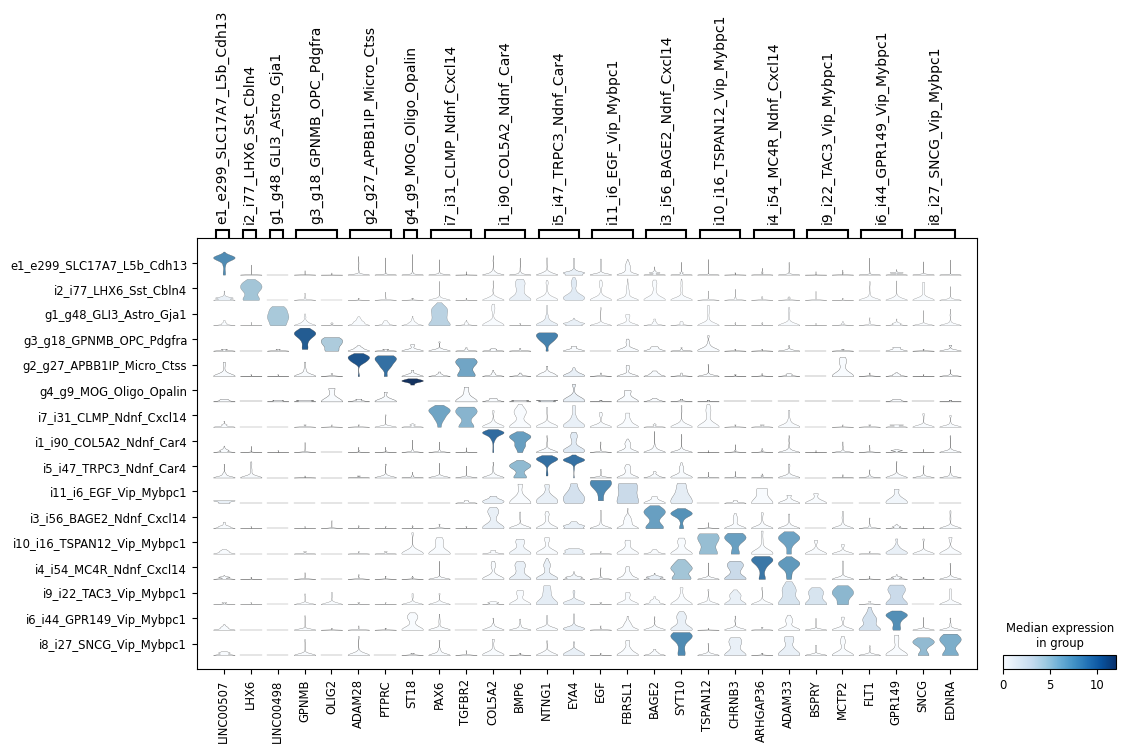

In [28]:
ns.pl.stackedviolin(adata, markers_dict, cluster_header, dendrogram = dendrogram, save = True, output_folder = output_folder, outputfilename_suffix = outputfilename_prefix)

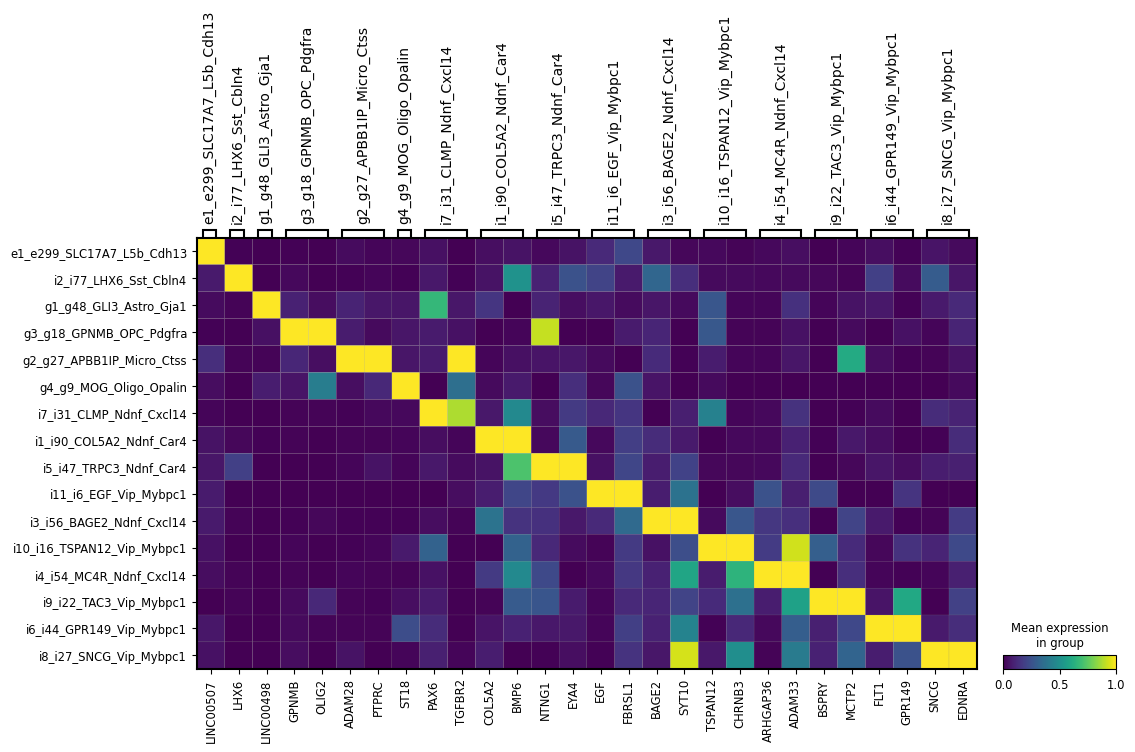

In [29]:
ns.pl.matrixplot(adata, markers_dict, cluster_header, dendrogram = dendrogram, save = True, output_folder = output_folder, outputfilename_suffix = outputfilename_prefix)

### Evaluating input marker list

#### Getting marker list in dictionary format: {cluster: marker_list}

In [30]:
markers = pd.read_csv("../demo_data/marker_list.csv")
markers_dict = utils.prepare_markers(markers, "clusterName", "markers")
markers_dict

{'e1_e299_SLC17A7_L5b_Cdh13': ['SLC17A7', 'CDH13'],
 'g1_g48_GLI3_Astro_Gja1': ['GLI3', 'GJA1'],
 'g2_g27_APBB1IP_Micro_Ctss': ['APBB1IP', 'CTSS'],
 'g3_g18_GPNMB_OPC_Pdgfra': ['GPNMB', 'PDGFRA'],
 'g4_g9_MOG_Oligo_Opalin': ['MOG', 'OPALIN'],
 'i10_i16_TSPAN12_Vip_Mybpc1': ['TSPAN12', 'VIP', 'MYBPC1'],
 'i11_i6_EGF_Vip_Mybpc1': ['EGF', 'VIP', 'MYBPC1'],
 'i1_i90_COL5A2_Ndnf_Car4': ['COL5A2', 'NDNF', 'CAR4'],
 'i2_i77_LHX6_Sst_Cbln4': ['LHX6', 'SST', 'CBLN4'],
 'i3_i56_BAGE2_Ndnf_Cxcl14': ['BAGE2', 'NDNF', 'CXCL14'],
 'i4_i54_MC4R_Ndnf_Cxcl14': ['MC4R', 'NDNF', 'CXCL14'],
 'i5_i47_TRPC3_Ndnf_Car4': ['TRPC3', 'NDNF', 'CAR4'],
 'i6_i44_GPR149_Vip_Mybpc1': ['GPR149', 'VIP', 'MYBPC1'],
 'i7_i31_CLMP_Ndnf_Cxcl14': ['CLMP', 'NDNF', 'CXCL14'],
 'i8_i27_SNCG_Vip_Mybpc1': ['SNCG', 'VIP', 'MYBPC1'],
 'i9_i22_TAC3_Vip_Mybpc1': ['TAC3', 'VIP', 'MYBPC1']}

In [31]:
outputfilename_prefix = "marker_eval"
evaluation_results = ev.DecisionTree(adata, cluster_header, markers_dict, combinations = False, use_mean = False, 
                                             output_folder = output_folder, outputfilename_prefix = outputfilename_prefix)

Preparing data...
--- 0.006980180740356445 seconds ---
Number of clusters to evaluate: 16
1 out of 16:
	e1_e299_SLC17A7_L5b_Cdh13
	marker genes to be evaluated: ['SLC17A7', 'CDH13']
	['SLC17A7', 'CDH13']
	fbeta: 0.9450980392156862
	PPV: 0.9877049180327869
	recall: 0.8060200668896321
2 out of 16:
	g1_g48_GLI3_Astro_Gja1
	marker genes to be evaluated: ['GLI3', 'GJA1']
	['GLI3', 'GJA1']
	fbeta: 0.8928571428571429
	PPV: 1.0
	recall: 0.625
3 out of 16:
	g2_g27_APBB1IP_Micro_Ctss
	marker genes to be evaluated: ['APBB1IP', 'CTSS']
	['APBB1IP', 'CTSS']
	fbeta: 0.38461538461538464
	PPV: 1.0
	recall: 0.1111111111111111
4 out of 16:
	g3_g18_GPNMB_OPC_Pdgfra
	marker genes to be evaluated: ['GPNMB', 'PDGFRA']
	['GPNMB', 'PDGFRA']
	fbeta: 0.9285714285714286
	PPV: 1.0
	recall: 0.7222222222222222
5 out of 16:
	g4_g9_MOG_Oligo_Opalin
	marker genes to be evaluated: ['MOG', 'OPALIN']
	['MOG', 'OPALIN']
	fbeta: 0.9090909090909091
	PPV: 1.0
	recall: 0.6666666666666666
6 out of 16:
	i10_i16_TSPAN12_Vip_Mybp

Calculating medians (means) per cluster: 100%|██████████| 16/16 [00:00<00:00, 451.14it/s]

Saving final results table as...
../outputs_layer1/marker_eval_results.csv
--- 0.6103365421295166 seconds ---


In [32]:
evaluation_results

clusterName  clusterSize   f_score       PPV    recall  \
0    e1_e299_SLC17A7_L5b_Cdh13          299  0.945098  0.987705  0.806020   
1       g1_g48_GLI3_Astro_Gja1           48  0.892857  1.000000  0.625000   
2    g2_g27_APBB1IP_Micro_Ctss           27  0.384615  1.000000  0.111111   
3      g3_g18_GPNMB_OPC_Pdgfra           18  0.928571  1.000000  0.722222   
4       g4_g9_MOG_Oligo_Opalin            9  0.909091  1.000000  0.666667   
5   i10_i16_TSPAN12_Vip_Mybpc1           16  0.468750  0.750000  0.187500   
6        i11_i6_EGF_Vip_Mybpc1            6  0.000000  0.000000  0.000000   
7      i1_i90_COL5A2_Ndnf_Car4           90  0.879888  0.940299  0.700000   
8        i2_i77_LHX6_Sst_Cbln4           77  0.117647  1.000000  0.025974   
9     i3_i56_BAGE2_Ndnf_Cxcl14           56  0.564516  0.823529  0.250000   
10     i4_i54_MC4R_Ndnf_Cxcl14           54  0.719178  0.913043  0.388889   
11      i5_i47_TRPC3_Ndnf_Car4           47  0.000000  0.000000  0.000000   
12    i6_i44_GPR149_Vip_Mybpc1           44  0.187500  0.333333  0.068182   
13     i7_i31_CLMP_Ndnf_Cxcl14           31  0.354839  0.354839  0.354839   
14      i8_i27_SNCG_Vip_Mybpc1           27  0.000000  0.000000  0.000000   
15      i9_i22_TAC3_Vip_Mybpc1           22  0.526316  1.000000  0.181818   

     TN  FP  FN   TP  marker_count                 markers  onTarget  
0   569   3  58  241             2        [SLC17A7, CDH13]  0.548527  
1   823   0  18   30             2            [GLI3, GJA1]  0.854088  
2   844   0  24    3             2         [APBB1IP, CTSS]  0.955321  
3   853   0   5   13             2         [GPNMB, PDGFRA]  0.680299  
4   862   0   3    6             2           [MOG, OPALIN]  1.000000  
5   854   1  13    3             3  [TSPAN12, VIP, MYBPC1]  0.209097  
6   865   0   6    0             3      [EGF, VIP, MYBPC1]  0.112842  
7   777   4  27   63             2          [COL5A2, NDNF]  0.608344  
8   794   0  75    2             3      [LHX6, SST, CBLN4]  0.420224  
9   812   3  42   14             3   [BAGE2, NDNF, CXCL14]  0.103398  
10  815   2  33   21             3    [MC4R, NDNF, CXCL14]  0.351766  
11  803  21  47    0             2           [TRPC3, NDNF]  0.292197  
12  821   6  41    3             3   [GPR149, VIP, MYBPC1]  0.235686  
13  820  20  20   11             3    [CLMP, NDNF, CXCL14]  0.180560  
14  844   0  27    0             3     [SNCG, VIP, MYBPC1]  0.153438  
15  849   0  18    4             3     [TAC3, VIP, MYBPC1]  0.288938

#### Plotting classification metrics from marker evaluation

In [33]:
ns.pl.boxplot(evaluation_results, "f_score")

In [34]:
ns.pl.boxplot(evaluation_results, "PPV")

In [35]:
ns.pl.boxplot(evaluation_results, "recall")

In [36]:
ns.pl.boxplot(evaluation_results, "onTarget")

In [37]:
ns.pl.scatter_w_clusterSize(evaluation_results, "f_score")

In [38]:
ns.pl.scatter_w_clusterSize(evaluation_results, "PPV")

In [39]:
ns.pl.scatter_w_clusterSize(evaluation_results, "recall")

In [40]:
ns.pl.scatter_w_clusterSize(evaluation_results, "onTarget")

### Plotting scanpy dot plot, violin plot, matrix plot for input marker list

**Note:** Assign pre-defined dendrogram order here **or** use `adata.uns["dendrogram_" + cluster_header]["categories_ordered"]`. 

In [41]:
to_plot = evaluation_results.copy()

In [42]:
dendrogram = [] # custom dendrogram order
dendrogram = list(adata.uns["dendrogram_" + cluster_header]["categories_ordered"])
to_plot["clusterName"] = to_plot["clusterName"].astype("category")
to_plot["clusterName"] = to_plot["clusterName"].cat.set_categories(dendrogram)
to_plot = to_plot.sort_values("clusterName")
to_plot = to_plot.rename(columns = {"NSForest_markers": "markers"})
to_plot.head()

clusterName  clusterSize   f_score       PPV    recall  \
0    e1_e299_SLC17A7_L5b_Cdh13          299  0.945098  0.987705  0.806020   
13     i7_i31_CLMP_Ndnf_Cxcl14           31  0.354839  0.354839  0.354839   
7      i1_i90_COL5A2_Ndnf_Car4           90  0.879888  0.940299  0.700000   
11      i5_i47_TRPC3_Ndnf_Car4           47  0.000000  0.000000  0.000000   
5   i10_i16_TSPAN12_Vip_Mybpc1           16  0.468750  0.750000  0.187500   

     TN  FP  FN   TP  marker_count                 markers  onTarget  
0   569   3  58  241             2        [SLC17A7, CDH13]  0.548527  
13  820  20  20   11             3    [CLMP, NDNF, CXCL14]  0.180560  
7   777   4  27   63             2          [COL5A2, NDNF]  0.608344  
11  803  21  47    0             2           [TRPC3, NDNF]  0.292197  
5   854   1  13    3             3  [TSPAN12, VIP, MYBPC1]  0.209097

In [43]:
markers_dict = dict(zip(to_plot["clusterName"], to_plot["markers"]))
markers_dict

{'e1_e299_SLC17A7_L5b_Cdh13': ['SLC17A7', 'CDH13'],
 'i7_i31_CLMP_Ndnf_Cxcl14': ['CLMP', 'NDNF', 'CXCL14'],
 'i1_i90_COL5A2_Ndnf_Car4': ['COL5A2', 'NDNF'],
 'i5_i47_TRPC3_Ndnf_Car4': ['TRPC3', 'NDNF'],
 'i10_i16_TSPAN12_Vip_Mybpc1': ['TSPAN12', 'VIP', 'MYBPC1'],
 'i4_i54_MC4R_Ndnf_Cxcl14': ['MC4R', 'NDNF', 'CXCL14'],
 'i9_i22_TAC3_Vip_Mybpc1': ['TAC3', 'VIP', 'MYBPC1'],
 'i6_i44_GPR149_Vip_Mybpc1': ['GPR149', 'VIP', 'MYBPC1'],
 'i8_i27_SNCG_Vip_Mybpc1': ['SNCG', 'VIP', 'MYBPC1'],
 'g1_g48_GLI3_Astro_Gja1': ['GLI3', 'GJA1'],
 'g3_g18_GPNMB_OPC_Pdgfra': ['GPNMB', 'PDGFRA'],
 'g2_g27_APBB1IP_Micro_Ctss': ['APBB1IP', 'CTSS'],
 'g4_g9_MOG_Oligo_Opalin': ['MOG', 'OPALIN'],
 'i2_i77_LHX6_Sst_Cbln4': ['LHX6', 'SST', 'CBLN4'],
 'i11_i6_EGF_Vip_Mybpc1': ['EGF', 'VIP', 'MYBPC1'],
 'i3_i56_BAGE2_Ndnf_Cxcl14': ['BAGE2', 'NDNF', 'CXCL14']}

C:\Users\bpeng\AppData\Local\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



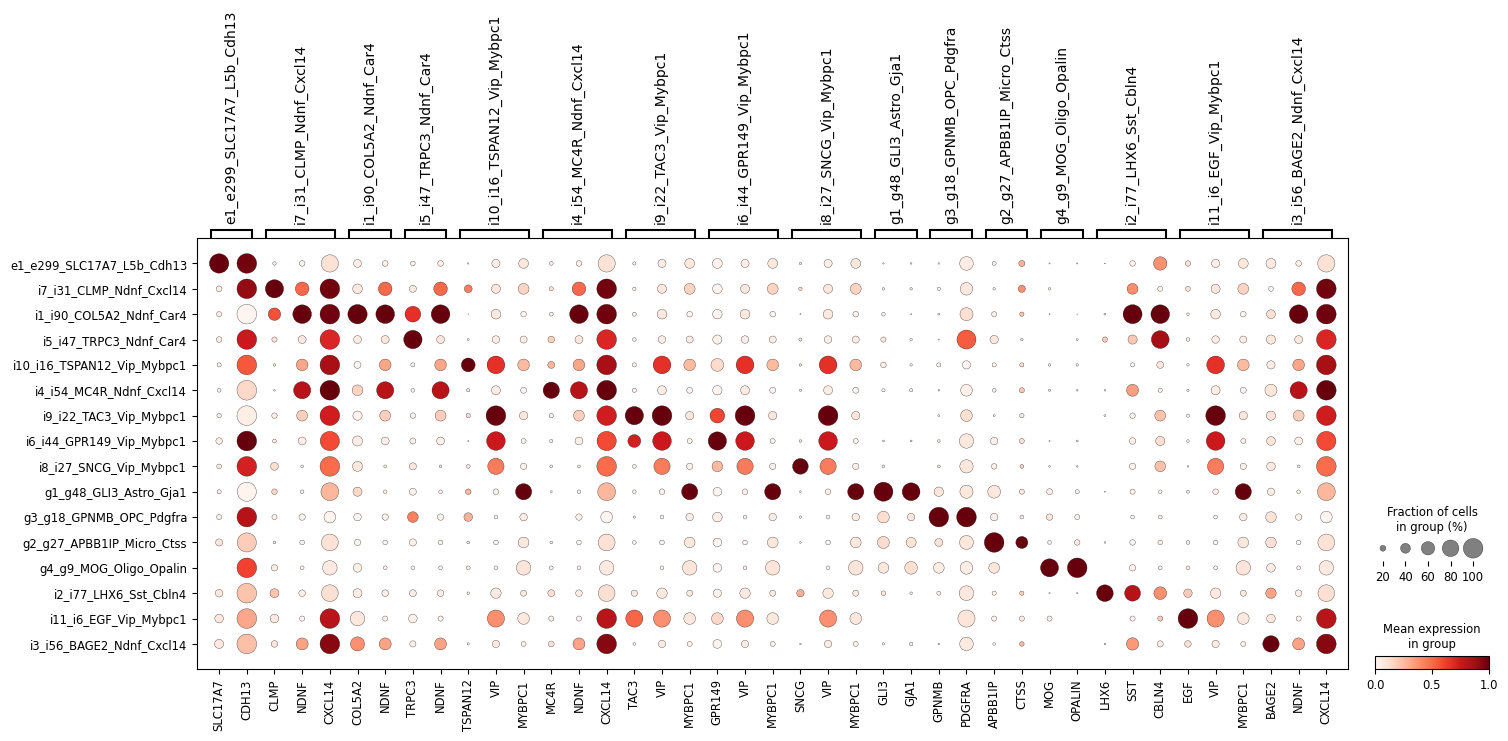

In [44]:
ns.pl.dotplot(adata, markers_dict, cluster_header, dendrogram = dendrogram, save = True, output_folder = output_folder, outputfilename_suffix = outputfilename_prefix)

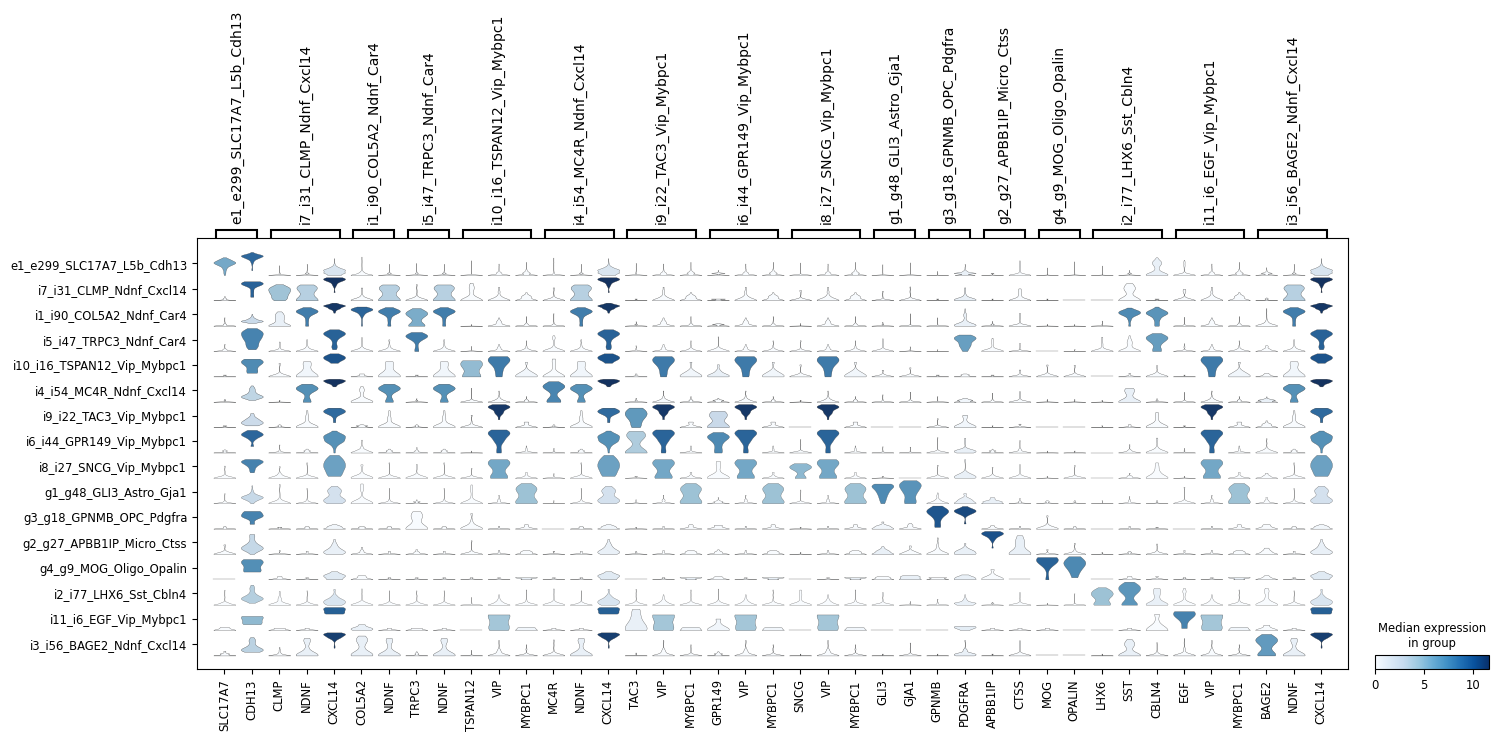

In [46]:
ns.pl.stackedviolin(adata, markers_dict, cluster_header, dendrogram = dendrogram, save = True, output_folder = output_folder, outputfilename_suffix = outputfilename_prefix)

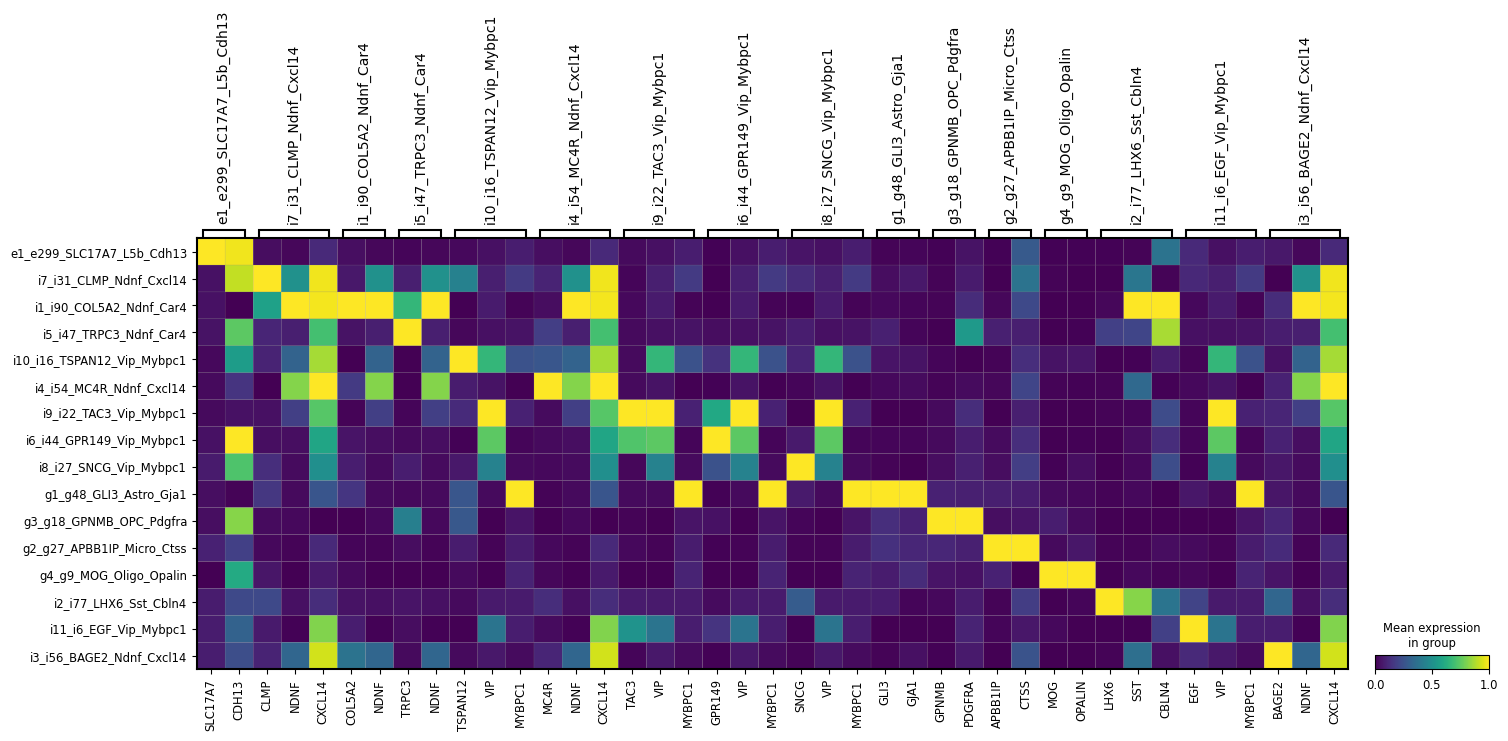

In [47]:
ns.pl.matrixplot(adata, markers_dict, cluster_header, dendrogram = dendrogram, save = True, output_folder = output_folder, outputfilename_suffix = outputfilename_prefix)